In [1]:
# to check the version installed in your computer:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [1]:
# imports, baseline
import warnings
from math import sqrt, pi

import matplotlib.cbook
import numpy as np
from IPython.display import display
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_textbook.widgets import plot_bloch_vector_spherical
# plot_bloch_vector(), as input only takes cartesian coordinates; as output s output does graph the Bloch sphere
# plot_bloch_vector_spherical(), does the conversion between cartesian coordinates and spherical coordinates. As input takes spherical coordinates; as output does graph the Bloch sphere
# plot_bloch_multivector, as input it takes a statevector; as output does graph the Bloch sphere

# https://stackoverflow.com/questions/24502500/python-matplotlib-getting-rid-of-matplotlib-mpl-warning
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

/tmp/ipykernel_4394/482951813.py:18: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


# Initialize


The OpenQASM string for the circuit is:
 OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];


Total number of gate operations in circuit: 0

Number of qubits plus clbits in circuit: 1
statevector is [0.70710678+0.j         0.        +0.70710678j]


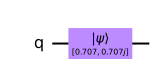

MEASURE


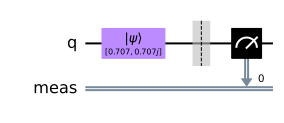

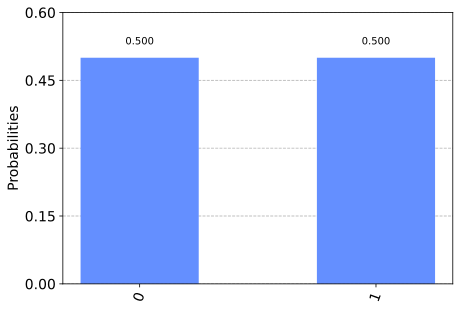

In [3]:
sim = Aer.get_backend('statevector_simulator')
qc = QuantumCircuit(1, name='my_quantum_circuit')
print('\nThe OpenQASM string for the circuit is:\n', qc.qasm())
print('\nTotal number of gate operations in circuit:', qc.size())
print('\nNumber of qubits plus clbits in circuit:', qc.width())

#|ψ⟩ = |1⟩ = 0|0⟩ + 1|1⟩)
#initial_state = [0, 1j]

#|ψ⟩ = |i⟩ = 1/√2 (|0⟩ + i|1⟩)
initial_state = [1/sqrt(2), 1j/1/sqrt(2)]

qc.initialize(initial_state, 0)
qobj = assemble(qc)
result = sim.run(qobj).result()


# VISUALIZE
statevector = result.get_statevector()
print('statevector is', statevector)
display(qc.draw())

# MEASURE
print('MEASURE')
qc.measure_all()
display(qc.draw())
counts = result.get_counts()
plot_histogram(counts)



# Aer backends

In [4]:
# https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463
backends = Aer.backends()
for i, backend in enumerate(backends):
    print(backend)
    print(backend.name())

aer_simulator
aer_simulator
aer_simulator_statevector
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_unitary
aer_simulator_superop
aer_simulator_superop
qasm_simulator
qasm_simulator
statevector_simulator
statevector_simulator
unitary_simulator
unitary_simulator
pulse_simulator
pulse_simulator


# Single Qubit Gates

## Result of X-gate, Y-gate, Z-gate, etc., on single qubit circuits, on known states `|0⟩`, `|1⟩`, `|+⟩`, `|-⟩`, `|i⟩`, `|-i⟩`

## X-gate

```math
X|0⟩ = |1⟩ from [1.+0.j 0.+0.j] to [0.+0.j 1.+0.j]
X|1⟩ = |0⟩ from [0.+0.j 1.+0.j] to [1.+0.j 0.+0.j]

X|+⟩ =  |+⟩ what is the eigenvalue λ though? (+1?), from [0.70710678+0.j 0.70710678+0.j] to [0.70710678+0.j 0.70710678+0.j]
X|-⟩ = -|-⟩ what is the eigenvalue λ though? (-1)?, from [0.70710678+0.j -0.70710678+0.j] to [-0.70710678+0.j  0.70710678+0.j]

X| i⟩ = |-i⟩ from [0.70710678+0.j 0.+0.70710678j] to [0.+0.70710678j 0.70710678+0.j]
X|-i⟩ = | i⟩ from [0.70710678+0.j -0.-0.70710678j] to [-0.-0.70710678j  0.70710678+0.j]
```


## Y-gate

```math
Y|0⟩ =  i |1⟩ from [1.+0.j 0.+0.j] to [0.-0.j 0.+1.j]
Y|1⟩ = -i |0⟩ from [0.+0.j 1.+0.j] to [0.-1.j 0.+0.j]

Y|+⟩ = |-⟩ from [0.70710678+0.j 0.70710678+0.j] to [0.-0.70710678j 0.+0.70710678j]
Y|-⟩ = |+⟩ from [0.70710678+0.j -0.70710678+0.j] to [0.+0.70710678j 0.+0.70710678j]

Y| i⟩ = | i⟩ what is the eigenvalue λ though? (+1?) from [0.70710678+0.j 0.+0.70710678j] to [0.70710678-0.j 0.+0.70710678j]
Y|-i⟩ = |-i⟩ what is the eigenvalue λ though? (-1?) from [0.70710678+0.j -0.-0.70710678j] to [-0.70710678+0.j 0.+0.70710678j]
```

## Z-gate

```math
Z|0⟩ = |0⟩ what is the eigenvalue λ though? (+1?) from [1.+0.j 0.+0.j] to [1.+0.j -0.+0.j]
Z|1⟩ = |1⟩ what is the eigenvalue λ though? (-1?) from [0.+0.j 1.+0.j] to [0.+0.j -1.+0.j]

Z|+⟩ = |-⟩ from [0.70710678+0.j 0.70710678+0.j] to [0.70710678+0.j -0.70710678+0.j]
Z|-⟩ = |+⟩ from [0.70710678+0.j -0.70710678+0.j] to [0.70710678+0.j 0.70710678-0.j]

Z| i⟩ = |-i⟩ from [0.70710678+0.j 0.+0.70710678j] to [0.70710678+0.j -0.-0.70710678j]
Z|-i⟩ = | i⟩ from [0.70710678+0.j -0.-0.70710678j] to [-0.-0.70710678j 0.70710678+0.j]
```

## H-gate

```math
H|0⟩ = |+⟩ from [1.+0.j 0.+0.j] to [0.70710678+0.j 0.70710678+0.j]
H|1⟩ = |-⟩ from [0.+0.j 1.+0.j] to [0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]

H|+⟩ = |0⟩ from [0.70710678+0.j 0.70710678+0.j] to [1.00000000e+00-6.123234e-17j -1.11022302e-16+6.123234e-17j]
H|-⟩ = |1⟩ from [0.70710678+0.j -0.70710678+0.j] to [1.11022302e-16+6.123234e-17j 1.00000000e+00-6.123234e-17j]

H| i⟩ = |-i⟩ from [0.70710678+0.j 0.+0.70710678j] to [0.5+0.5j 0.5-0.5j]
H|-i⟩ = | i⟩ from [0.70710678+0.j -0.-0.70710678j] to [0.5-0.5j 0.5+0.5j]
```

Before the gate, statevector: [0.70710678+0.j         0.        +0.70710678j]


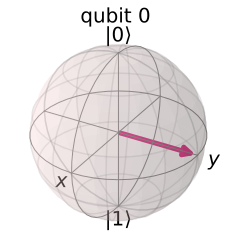

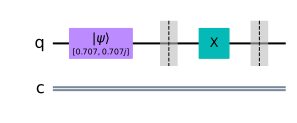

After the gate, statevector: [0.        +0.70710678j 0.70710678+0.j        ]


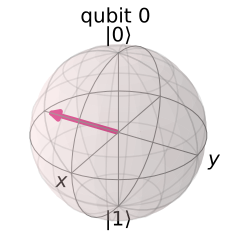

In [5]:
sim = Aer.get_backend('statevector_simulator')
qc = QuantumCircuit(1, 1)

# ENCODE
initial_state = [1.+0.j, 0.+0.j] # |ψ⟩ = |0⟩
initial_state = [0.+0.j, 1.+0.j] # |ψ⟩ = |1⟩
initial_state = [1/sqrt(2), +1/sqrt(2)]  # |ψ⟩ = |+⟩
initial_state = [1/sqrt(2), -1/sqrt(2)]  # |ψ⟩ = |-⟩
initial_state = [1/sqrt(2), +1.j/sqrt(2)]  # |ψ⟩ = |i⟩
#initial_state = [1/sqrt(2), -1.j/sqrt(2)]  # |ψ⟩ = |-i⟩
qc.initialize(initial_state, 0)
qc.barrier()

##
qobj = assemble(qc)
result = sim.run(qobj).result().get_statevector()
print('Before the gate, statevector:', result)
display(plot_bloch_multivector(result))

# COMPUTE
qc.x(0)
#qc.y(0)
#qc.z(0)
#qc.h(0)
qc.barrier()

# EXTRACT, MEASURE
#qc.measure(0, 0)

# VISUALIZE
display(qc.draw())

qobj = assemble(qc)
result = sim.run(qobj).result().get_statevector()
print('After the gate, statevector:', result)
display(plot_bloch_multivector(result))

Qubit State = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


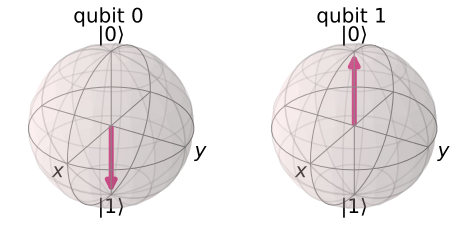

Qubit State = [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]


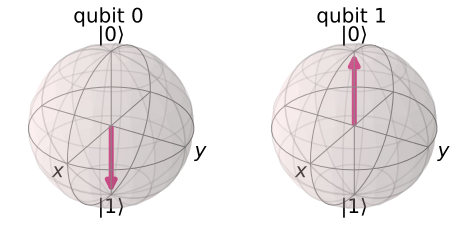

Before the gate, statevector: [0, 1]
After the gate, statevector: [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]


In [6]:
qc = QuantumCircuit(2)
# define the simulator to use
svsim = Aer.get_backend('statevector_simulator')

initial_state = [1, 0] # |ψ⟩ = |0⟩
initial_state = [0, 1] # |ψ⟩ = |1⟩
#initial_state = [1/sqrt(2), +1/sqrt(2)]  # |ψ⟩ = |+⟩
#initial_state = [1/sqrt(2), -1/sqrt(2)]  # |ψ⟩ = |-⟩
#initial_state = [1/sqrt(2), +1.j/sqrt(2)]  # |ψ⟩ = |i⟩
#initial_state = [1/sqrt(2), -1.j/sqrt(2)]  # |ψ⟩ = |-i⟩
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0)

#
# COMPUTE, OPERATIONS (GATES)
#
qc.id(0) # do nothing I-gate, identity gate
# create qobj, execute the circuit and display the resulting statevector
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print("Qubit State = " + str(state))
# View state in the Bloch sphere
#plot_bloch_multivector(state)
display(plot_bloch_multivector(state))


#
# COMPUTE, OPERATIONS (GATES)
#
qc.z(0)
# create qobj, execute the circuit and display the resulting statevector
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print("Qubit State = " + str(state))
# View state in the Bloch sphere
#plot_bloch_multivector(state)
display(plot_bloch_multivector(state))

print('Before the gate, statevector:', str(initial_state))
print('After the gate, statevector:', str(state))

```math
-------------

X|0⟩ =    |1⟩
X|1⟩ =    |0⟩

Y|0⟩ =   i|1⟩
Y|1⟩ =  -i|0⟩

Z|0⟩ =    |0⟩
Z|1⟩ =   -|1⟩

-------------

X|+⟩ =    |+⟩
X|-⟩ =    |-⟩

Y|+⟩ =    |-⟩
Y|-⟩ =    |+⟩

Z|+⟩ =    |-⟩
Z|-⟩ =    |+⟩

-------------

X| i⟩ =    |-i⟩
X|-i⟩ =    | i⟩

Y| i⟩ =    | i⟩
Y|-i⟩ =    |-i⟩

Z| i⟩ =    |-i⟩
Z|-i⟩ =    | i⟩

-------------
```

# CNOT

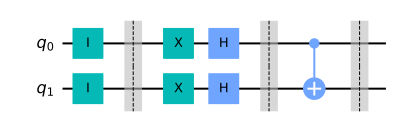

<IPython.core.display.Math object>

<IPython.core.display.Math object>

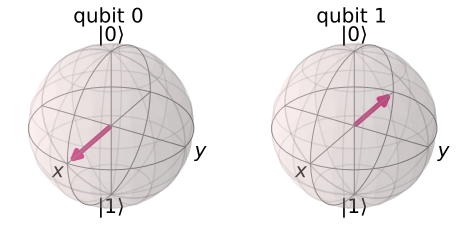

In [7]:
qc = QuantumCircuit(2)

# ENCODE
qc.id(0)
qc.id(1)
qc.barrier()

# COMPUTE
# put qubit 0 in state |-⟩
qc.x(0)
qc.h(0)
# put qubit 1 in state |-⟩
qc.x(1)
qc.h(1)
qc.barrier()
# applcy CNOT
qc.cnot(0, 1)
qc.barrier()

# EXTRACT, MEASURE
# n/a

# VISUALIZE
# circuit
display(qc.draw())

qobj = assemble(qc)
# unitary matrix
usim = Aer.get_backend('unitary_simulator')
unitary_matrix = usim.run(qobj).result().get_unitary()
array_to_latex(unitary_matrix, pretext="\\text{Circuit} = ")

# statevector
svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qobj).result().get_statevector()
array_to_latex(statevector, pretext="\\text{Statevector} = |ψ⟩ =", precision=1)

# Bloch sphere
display(plot_bloch_multivector(statevector))

# Quantum Registers

In [8]:
from qiskit import *

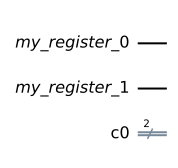

In [9]:
qr = QuantumRegister(2,name='my_register')
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.draw()

count(0)
my_qr_pepe
re.compile('[a-z][a-zA-Z0-9_]*')
q
2
qreg my_qr_pepe[2];
qreg my_qr_2[1];


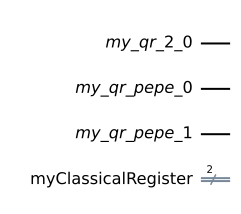

In [10]:
my_qr1 = QuantumRegister(2, name='my_qr_pepe')
my_qr2 = QuantumRegister(1, name='my_qr_2')
my_qr3 = QuantumRegister(1, name='my_qr_3')
print(my_qr1.instances_counter)
print(my_qr1.name)
print(my_qr1.name_format)
print(my_qr1.prefix)
print(my_qr1.size)
print(my_qr1.qasm())
print(my_qr2.qasm())
cr = ClassicalRegister(2, name='myClassicalRegister')

qc = QuantumCircuit(my_qr2, my_qr1, cr)
qc.draw()

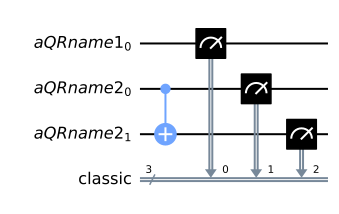

In [11]:
qr1 = QuantumRegister(1, 'aQRname1') 
qr2 = QuantumRegister(2, 'aQRname2') 
cr = ClassicalRegister(3, 'classic') 
circuit = QuantumCircuit(qr1, qr2, cr) 

circuit.cx(qr2[0], qr2[1]) 

circuit.measure(qr1[0],cr[0]) 
circuit.measure(qr2[0],cr[1]) 
circuit.measure(qr2[1],cr[2]) 
circuit.draw()

# ry

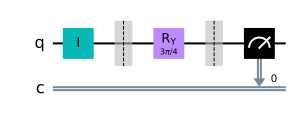

In [12]:
# quantum circuit with 1 qubit and 1 bit
qc = QuantumCircuit(1, 1)
# ENCODE
qc.id(0)
qc.barrier()

# COMPUTE
qc.ry(3 * pi/4, 0)
qc.barrier()

# MEASURE
qc.measure(0, 0)

# Visualize circuit
qc.draw()

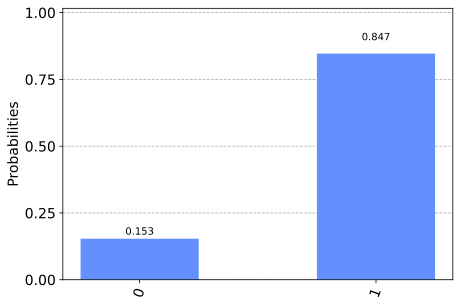

In [13]:
# define the simulator to use
svsim = Aer.get_backend('qasm_simulator')
#svsim = Aer.get_backend('statevector_simulator')

qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = svsim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

#state = result.get_statevector()

# Toffoli

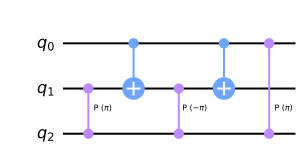

In [20]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2

#qc.ccx(0,1,2)

#theta = pi
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)

qc.draw()

In [21]:
# The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

# entanglement of n qubits

In [ ]:
# entanglement of n qubits
qc = QuantumCircuit(3)

# ENCODE
# n/a

# COMPUTE
# put qubit 0 in state |+⟩
qc.h(0)
qc.cx(0, 1)
#either 
#qc.cx(0, 2
#or 
qc.cx(1, 2)
qc.barrier()

# EXTRACT, MEASURE
# n/a

# VISUALIZE
# circuit
display(qc.draw())

qobj = assemble(qc)
# unitary matrix
usim = Aer.get_backend('unitary_simulator')
unitary_matrix = usim.run(qobj).result().get_unitary()
array_to_latex(unitary_matrix, pretext="\\text{Circuit} = ")

# statevector
svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qobj).result().get_statevector()
array_to_latex(statevector, pretext="\\text{Statevector} = |ψ⟩ =", precision=1)

# Bloch sphere
display(plot_bloch_multivector(statevector))

In [60]:
initial_state = [1/sqrt(2), 1/sqrt(2)]
#initial_state = [1, 0]
#initial_state = [1j, 0]
initial_state = [1/sqrt(2), 1j/sqrt(2)]

probability = 0
for i in initial_state:
    amplitude = abs(i)  # amplitude is the absolute value
    print("amplitude (number x its_conjugate and then all squared) of ", i , " is ", amplitude)
    amplitude_square = amplitude ** 2
    print("probability (which is the amplitude_square) of ", i, " is: ", amplitude_square)
    probability = probability + amplitude_square
    print("probability this far is: ", probability)

print("Probability, total of all the states, is: ", probability)

amplitude (number x its_conjugate and then all squared) of  0.7071067811865475  is  0.7071067811865475
probability (which is the amplitude_square) of  0.7071067811865475  is:  0.4999999999999999
probability this far is:  0.4999999999999999
amplitude (number x its_conjugate and then all squared) of  0.7071067811865475j  is  0.7071067811865475
probability (which is the amplitude_square) of  0.7071067811865475j  is:  0.4999999999999999
probability this far is:  0.9999999999999998
Probability, total of all the states, is:  0.9999999999999998


In [18]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [33]:
# Define initial_state as |ψ⟩
# |ψ⟩ = 1/√2 |0⟩ + i 1/√2 |1⟩
initial_state = [1/sqrt(2),1j/sqrt(2)]

svsim = Aer.get_backend('statevector_simulator')

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

for i in range(100):
    # put the qubit in the initial state
    qc.initialize(initial_state, 0)

    qc.measure_all()

    qobj = assemble(qc)
    state = svsim.run(qobj).result().get_statevector()
    print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([0.+0.j, 0.+1.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State of Measured Qubit = Statevector([1.+0.j, 0.+0.